In [3]:

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point

<Axes: >

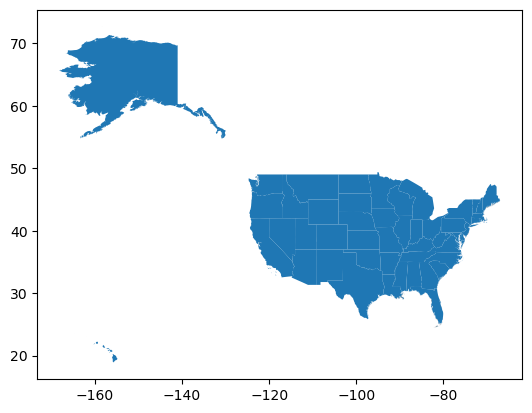

In [4]:
us_states = gpd.read_file('data/GeoPandas Applications/us_states.shp')
us_states.plot()

In [5]:
airports_data = pd.read_csv('data/GeoPandas Applications/us_airports.csv')
airports_data.head(10)

,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228
5,BHM,Birmingham International,Birmingham,AL,USA,33.562943,-86.753550
6,BNA,Nashville International,Nashville,TN,USA,36.124477,-86.678182
7,BOS,Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179
8,BUF,Buffalo Niagara Intl,Buffalo,NY,USA,42.940525,-78.732167
9,BUR,Burbank-Glendale-Pasadena,Burbank,CA,USA,34.200619,-118.358497


In [6]:
airports_data.columns

Index(['IATA', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE'], dtype='object')

In [10]:
geometry = [ Point(xy) for xy in zip( airports_data['LONGITUDE'], airports_data['LATITUDE'])]

In [8]:
type(geometry)

list

<Axes: >

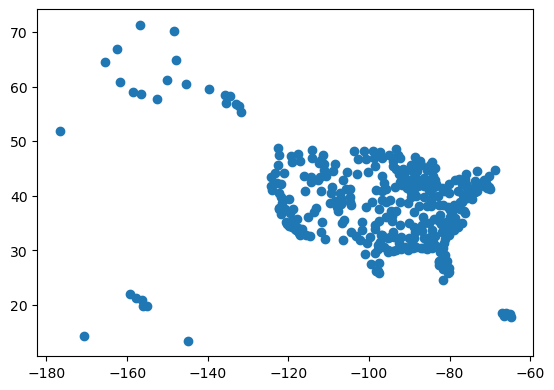

In [11]:
airports_us = gpd.GeoDataFrame(airports_data, geometry=geometry, crs=us_states.crs)
airports_us.plot()

In [32]:
airports_us.head(10)

,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,geometry
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194,POINT (-106.60919 35.04022)
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186,POINT (-149.99619 61.17432)
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,POINT (-84.42694 33.64044)
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872,POINT (-97.66987 30.19453)
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228,POINT (-72.68323 41.93887)
5,BHM,Birmingham International,Birmingham,AL,USA,33.562943,-86.753550,POINT (-86.75355 33.56294)
6,BNA,Nashville International,Nashville,TN,USA,36.124477,-86.678182,POINT (-86.67818 36.12448)
7,BOS,Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179,POINT (-71.00518 42.36435)
8,BUF,Buffalo Niagara Intl,Buffalo,NY,USA,42.940525,-78.732167,POINT (-78.73217 42.94052)
9,BUR,Burbank-Glendale-Pasadena,Burbank,CA,USA,34.200619,-118.358497,POINT (-118.35850 34.20062)


In [18]:
#Importing the states ESRI Shapefile of the 

In [12]:
state_names_codes = pd.read_csv('data/GeoPandas Applications/state names and codes.csv')

In [8]:
state_names_codes.head(10)

,state_name,state_code
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


In [10]:
# Renaming the column heading 

In [13]:
airports_us.rename(columns = {"STATE": "state_code"}, inplace = True )

In [14]:
airports_us.columns

Index(['IATA', 'AIRPORT', 'CITY', 'state_code', 'COUNTRY', 'LATITUDE',
       'LONGITUDE', 'geometry'],
      dtype='object')

In [35]:
#JOIN attributes  

In [15]:
airports_us = airports_us.merge(state_names_codes, on = 'state_code')

In [37]:
airports_us.head()

,IATA,AIRPORT,CITY,state_code,COUNTRY,LATITUDE,LONGITUDE,geometry,state_name
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194,POINT (-106.60919 35.04022),New Mexico
1,HOB,Lea County Regional,Hobbs,NM,USA,32.687528,-103.217028,POINT (-103.21703 32.68753),New Mexico
2,ROW,Roswell Industrial Air Center,Roswell,NM,USA,33.301556,-104.530556,POINT (-104.53056 33.30156),New Mexico
3,SAF,Santa Fe Municipal,Santa Fe,NM,USA,35.616778,-106.088139,POINT (-106.08814 35.61678),New Mexico
4,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872,POINT (-97.66987 30.19453),Texas


In [38]:
 #Spatial_Join

In [39]:
us_states.head(15)

,NAME_1,geometry
0,Alabama,"MULTIPOLYGON (((-88.11320 30.22623, -88.11291 ..."
1,Alaska,"MULTIPOLYGON (((-141.31459 60.05416, -141.3125..."
2,Arizona,"POLYGON ((-110.53930 37.00423, -110.47991 37.0..."
3,Arkansas,"POLYGON ((-93.36903 36.49686, -93.36530 36.496..."
4,California,"MULTIPOLYGON (((-117.23285 32.77641, -117.2330..."
5,Colorado,"POLYGON ((-104.13991 41.00190, -104.05284 41.0..."
6,Connecticut,"MULTIPOLYGON (((-73.65778 40.98278, -73.65781 ..."
7,Delaware,"MULTIPOLYGON (((-75.09446 38.43233, -75.09415 ..."
8,District of Columbia,"POLYGON ((-77.00851 38.96956, -76.98849 38.954..."
9,Florida,"MULTIPOLYGON (((-81.96347 24.52542, -81.96347 ..."


In [16]:
airports_us = airports_us [['AIRPORT', 'geometry']]
airports_us.columns

Index(['AIRPORT', 'geometry'], dtype='object')

<Axes: >

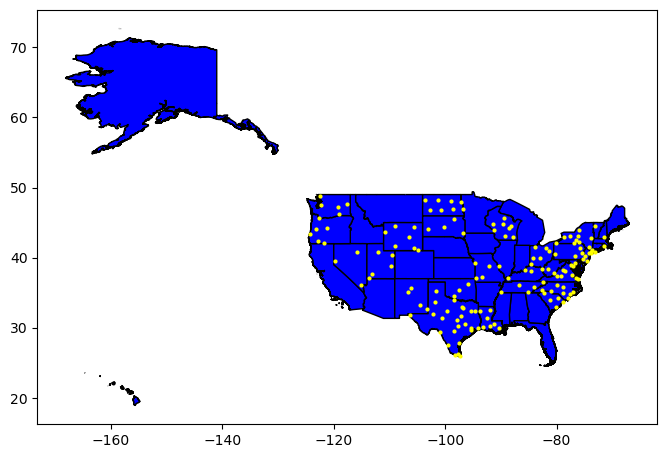

In [17]:
 fig, ax = plt.subplots(figsize = (8,8))
us_states.plot(ax = ax, color = 'blue', edgecolor = 'black')
airports_us.plot(ax=ax, markersize = 4, color='yellow')

In [18]:
airports_us = gpd.sjoin(airports_us, us_states, how  = 'inner', op = 'intersects')

C:\Users\SAV03\anaconda3\envs\gpd\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
